# 생명공학 꽃과 인공지능

### Matplotlib에서 폰트 설정

In [1]:
import urllib
from matplotlib import font_manager
from matplotlib import pyplot as plt

font_path = 'NanumGothic.ttf'
with open(font_path, 'wb') as f: 
    f.write(urllib.request.urlopen("https://github.com/team-monolith-product/jupyter-nanum/raw/main/NanumGothic.ttf").read())

# 글꼴을 등록합니다.
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

### [Step1] 데이터 로드

In [2]:
import pandas as pd

iris = pd.read_csv('datasets/iris.csv')
iris

,id,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,종류
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### [Step2] 데이터 파악하기

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      150 non-null    int64  
 1   꽃받침길이   150 non-null    float64
 2   꽃받침너비   150 non-null    float64
 3   꽃잎길이    150 non-null    float64
 4   꽃잎너비    150 non-null    float64
 5   종류      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris.describe()

,id,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### [Step3] 꽃 종류 별 통계 보기

In [5]:
iris['종류'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 종류, dtype: int64

In [6]:
print('Iris-setosa')
print(iris[iris['종류'] == 'Iris-setosa'].describe())
print('Iris-versicolor')
print(iris[iris['종류'] == 'Iris-versicolor'].describe())
print('Iris-virginica')
print(iris[iris['종류'] == 'Iris-virginica'].describe())

Iris-setosa
             id     꽃받침길이      꽃받침너비       꽃잎길이      꽃잎너비
count  50.00000  50.00000  50.000000  50.000000  50.00000
mean   25.50000   5.00600   3.418000   1.464000   0.24400
std    14.57738   0.35249   0.381024   0.173511   0.10721
min     1.00000   4.30000   2.300000   1.000000   0.10000
25%    13.25000   4.80000   3.125000   1.400000   0.20000
50%    25.50000   5.00000   3.400000   1.500000   0.20000
75%    37.75000   5.20000   3.675000   1.575000   0.30000
max    50.00000   5.80000   4.400000   1.900000   0.60000
Iris-versicolor
              id      꽃받침길이      꽃받침너비       꽃잎길이       꽃잎너비
count   50.00000  50.000000  50.000000  50.000000  50.000000
mean    75.50000   5.936000   2.770000   4.260000   1.326000
std     14.57738   0.516171   0.313798   0.469911   0.197753
min     51.00000   4.900000   2.000000   3.000000   1.000000
25%     63.25000   5.600000   2.525000   4.000000   1.200000
50%     75.50000   5.900000   2.800000   4.350000   1.300000
75%     87.75000   6.30

### [Step4] 데이터 시각화하기

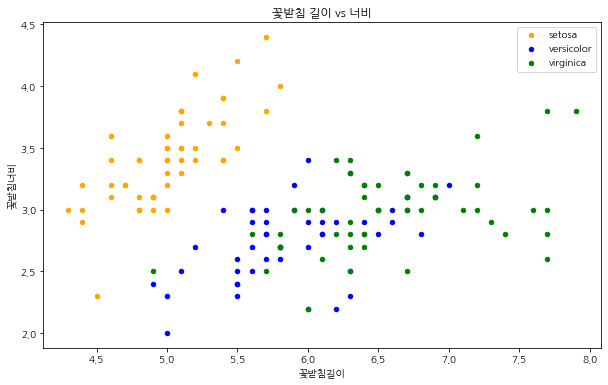

In [7]:
import matplotlib.pyplot as plt # 그래프 출력을 위한 모듈

# 꽃받침(Sepal)의 길이와 너비에 따른 분산형(scatter) 그래프 그리기
fig = iris[iris.종류 == 'Iris-setosa'].plot(kind = 'scatter', x = '꽃받침길이', y = '꽃받침너비', color = 'orange', label = 'setosa')
iris[iris.종류 == 'Iris-versicolor'].plot(kind = 'scatter', x = '꽃받침길이', y = '꽃받침너비', color = 'blue', label = 'versicolor', ax = fig)
iris[iris.종류 == 'Iris-virginica'].plot(kind = 'scatter', x = '꽃받침길이', y = '꽃받침너비', color = 'green', label = 'virginica', ax = fig)
fig.set_xlabel('꽃받침길이') # 그래프의 x축 제목 설정하기
fig.set_ylabel('꽃받침너비') # 그래프의 y축 제목 설정하기
fig.set_title('꽃받침 길이 vs 너비') # 그래프의 제목 설정하기
fig = plt.gcf( ) #현재 figure를 확인하기
fig.set_size_inches(10, 6)
plt.show( )

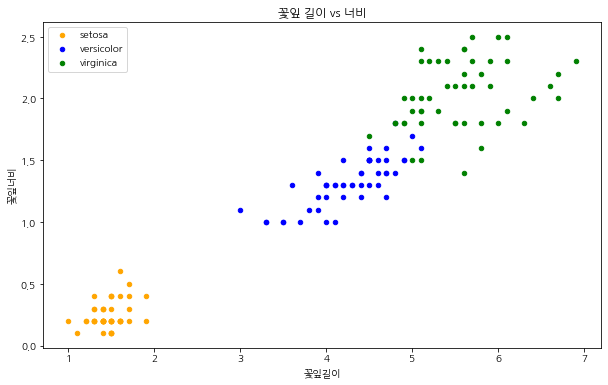

In [8]:
import matplotlib.pyplot as plt # 그래프 출력을 위한 모듈

# 꽃잎(Petal)의 길이와 너비에 따른 분산형(scatter) 그래프
fig = iris[iris.종류 == 'Iris-setosa'].plot(kind = 'scatter', x = '꽃잎길이', y = '꽃잎너비', color = 'orange', label = 'setosa')
iris[iris.종류 == 'Iris-versicolor'].plot(kind = 'scatter', x = '꽃잎길이', y = '꽃잎너비', color = 'blue', label = 'versicolor', ax = fig)
iris[iris.종류 == 'Iris-virginica'].plot(kind = 'scatter', x = '꽃잎길이', y = '꽃잎너비', color = 'green', label = 'virginica', ax = fig)
fig.set_xlabel('꽃잎길이') # 그래프의 x축 제목 설정하기
fig.set_ylabel('꽃잎너비') # 그래프의 y축 제목 설정하기
fig.set_title('꽃잎 길이 vs 너비') # 그래프의 제목 설정하기
fig = plt.gcf( )
fig.set_size_inches(10, 6)
plt.show( )

### [Step5] 데이터 형태 변화시키기

In [15]:
from sklearn.neighbors import KNeighborsClassifier

features = iris.iloc[:,1:-1] #두번째에서 마지막 이전 열 가져오기
target_value = iris.iloc[:,-1:] # 종류 열 가져오기 

print(iris)

      id  꽃받침길이  꽃받침너비  꽃잎길이  꽃잎너비              종류
0      1    5.1    3.5   1.4   0.2     Iris-setosa
1      2    4.9    3.0   1.4   0.2     Iris-setosa
2      3    4.7    3.2   1.3   0.2     Iris-setosa
3      4    4.6    3.1   1.5   0.2     Iris-setosa
4      5    5.0    3.6   1.4   0.2     Iris-setosa
..   ...    ...    ...   ...   ...             ...
145  146    6.7    3.0   5.2   2.3  Iris-virginica
146  147    6.3    2.5   5.0   1.9  Iris-virginica
147  148    6.5    3.0   5.2   2.0  Iris-virginica
148  149    6.2    3.4   5.4   2.3  Iris-virginica
149  150    5.9    3.0   5.1   1.8  Iris-virginica

[150 rows x 6 columns]


### [Step6] 모델 구성 및 학습하기

In [16]:
neigh = KNeighborsClassifier(n_neighbors = 3) #최근접 이웃 알고리즘, n은 3개로 분류
neigh.fit(features, target_value)

KNeighborsClassifier(n_neighbors=3)

### [Step7] 결과확인하기

In [11]:
result_1 = neigh.predict([features.iloc[-1]])
result_2 = neigh.predict([[6, 2.9, 5, 2]]) #가상의 데이터 입력, 꽃받침 길이, 너비, 꽃잎 길이, 꽃잎 너비 순서

print('실제 데이터를 분류한 결과 : {0}'.format(result_1))
print('가상 데이터를 분류한 결과 : {0}'.format(result_2))

실제 데이터를 분류한 결과 : ['Iris-virginica']
가상 데이터를 분류한 결과 : ['Iris-virginica']


In [13]:
# 고흐의 그림에서 수집한 데이터
ID_1 = [2.7, 2.4, 1.65, 0.67] #가상의 데이터 입력, 꽃받침 길이, 너비, 꽃잎 길이, 꽃잎 너비 순서
ID_2 = [5.84, 5.48, 3, 2.16] #가상의 데이터 입력, 꽃받침 길이, 너비, 꽃잎 길이, 꽃잎 너비 순서
ID_3 = [3.97, 4.01, 1.7, 0.67] #가상의 데이터 입력, 꽃받침 길이, 너비, 꽃잎 길이, 꽃잎 너비 순서

# K_NN 분류 함수를 이용하여 분류하기
result_1 = neigh.predict([ID_1])
result_2 = neigh.predict([ID_2])
result_3 = neigh.predict([ID_3])

print(result_1,result_2,result_3)

['Iris-setosa'] ['Iris-setosa'] ['Iris-setosa']
